Importing Pandas and Matplotlib libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib widget

In [3]:
# File paths for each optimization level
file_paths = {
    "O0": "../solutions/vector_add_avx2_O0_results.txt",
    "O1": "../solutions/vector_add_avx2_O1_results.txt",
    "O2": "../solutions/vector_add_avx2_O2_results.txt",
    "O3": "../solutions/vector_add_avx2_O3_results.txt"
}

In [4]:
# Dictionary to store data for plotting
data = {}

In [5]:
# Load data from each file
for opt_level, file_path in file_paths.items():
    # Read data from the file (skip the header line)
    data[opt_level] = np.loadtxt(file_path, skiprows=1)
    # Each data[opt_level] will have columns: Serial No., Size, Float Time, Double Time

In [6]:
# Extract sizes (assuming sizes are the same across files)
sizes = data["O0"][:, 1]  # Second column in each file
[print(int(size)) for size in sizes]

1000000
2000000
4000000
8000000
16000000
32000000
64000000
128000000
256000000
512000000
1024000000


[None, None, None, None, None, None, None, None, None, None, None]

In [7]:
# Extract times for each optimization level
float_times = {opt: data[opt][:, 2] for opt in file_paths}  # Third column (float times)
double_times = {opt: data[opt][:, 3] for opt in file_paths}  # Fourth column (double times)


In [8]:
# Iterate through the dictionary and print each float value
for opt_level, times in float_times.items():
    print(f"{opt_level}:")
    for value in times:
        print(f"{value:.6f}") 
    print() 

O0:
0.000780
0.001563
0.002990
0.005916
0.011623
0.023570
0.046935
0.093188
0.188966
0.378058
0.784095

O1:
0.000717
0.001275
0.002352
0.004254
0.008760
0.017363
0.034219
0.068422
0.142424
0.286616
0.577208

O2:
0.000700
0.001281
0.002340
0.004290
0.008786
0.017459
0.034335
0.068521
0.142664
0.286372
0.576811

O3:
0.000683
0.001291
0.002287
0.004166
0.008400
0.016690
0.032850
0.065408
0.136279
0.273688
0.552239



In [9]:
# Iterate through the dictionary and print each double values
for opt_level, times in double_times.items():
    print(f"{opt_level}:")
    for value in times:
        print(f"{value:.6f}") 
    print() 

O0:
0.001469
0.002865
0.005799
0.011608
0.023023
0.045833
0.091265
0.185772
0.372359
0.744874
1.462300

O1:
0.001203
0.002155
0.004294
0.008502
0.017058
0.033926
0.067860
0.142252
0.286606
0.574652
1.081610

O2:
0.001188
0.002170
0.004308
0.008502
0.017085
0.033924
0.067678
0.141775
0.286107
0.575340
1.092416

O3:
0.001139
0.002068
0.004134
0.008138
0.016288
0.032357
0.064789
0.135887
0.273474
0.548607
1.031665



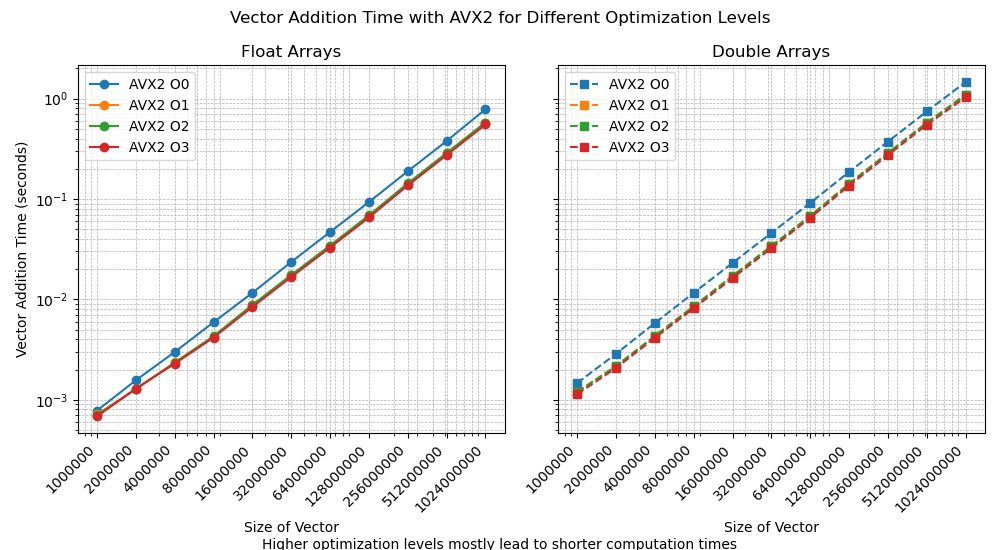

In [10]:
# Plotting
fig, (ax_float, ax_double) = plt.subplots(1, 2, figsize=(10, 5.5), sharey=True)
fig.suptitle("Vector Addition Time with AVX2 for Different Optimization Levels")

# Plot for float arrays
ax_float.plot(sizes, float_times['O0'], 'o-', label="AVX2 O0")
ax_float.plot(sizes, float_times['O1'], 'o-', label="AVX2 O1")
ax_float.plot(sizes, float_times['O2'], 'o-', label="AVX2 O2")
ax_float.plot(sizes, float_times['O3'], 'o-', label="AVX2 O3")
ax_float.set_xscale("log")
ax_float.set_yscale("log")
ax_float.set_title("Float Arrays")
ax_float.set_xlabel("Size of Vector")
ax_float.set_ylabel("Vector Addition Time (seconds)")
ax_float.legend()
ax_float.grid(True, which="both", linestyle="--", linewidth=0.5)

# Plot for double arrays
ax_double.plot(sizes, double_times['O0'], 's--', label="AVX2 O0")
ax_double.plot(sizes, double_times['O1'], 's--', label="AVX2 O1")
ax_double.plot(sizes, double_times['O2'], 's--', label="AVX2 O2")
ax_double.plot(sizes, double_times['O3'], 's--', label="AVX2 O3")
ax_double.set_xscale("log")
ax_double.set_yscale("log")
ax_double.set_title("Double Arrays")
ax_double.set_xlabel("Size of Vector")
ax_double.legend()
ax_double.grid(True, which="both", linestyle="--", linewidth=0.5)

# Add caption
plt.figtext(0.5, 0.01, "Higher optimization levels mostly lead to shorter computation times", ha="center", va="center", fontsize=10)

# Set x-ticks and rotate for better readability
ax_float.set_xticks(sizes)
ax_double.set_xticks(sizes)
ax_float.set_xticklabels([f"{int(s)}" for s in sizes], rotation=45, ha='right')
ax_double.set_xticklabels([f"{int(s)}" for s in sizes], rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("vector_addition_avx2.png")

# Display the plot
plt.show()